In [1]:
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(gridExtra)))
suppressWarnings(suppressPackageStartupMessages(library(cowplot)))
suppressWarnings(suppressPackageStartupMessages(library(viridis)))
suppressWarnings(suppressPackageStartupMessages(library(argparser)))    
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(patchwork)))

# load in theme
source("../../utils/figure_themes.r")

In [2]:
cell_type <- "PBMC"

In [3]:
df_stats_path <- file.path(
    paste0("../../../11.bulk_Morphology_Elastic_Network_LOCO/2.test_models/results/regression/",cell_type,"_aggregated_with_nomic/model_stats.csv"
    )
)


df_variance_path <- file.path(
    paste0("../../../11.bulk_Morphology_Elastic_Network_LOCO/2.test_models/results/regression/",cell_type,"_aggregated_with_nomic/variance_r2_stats.csv"
    )
)

# set up figure path
enet_cp_fig_path <- file.path("..","figures",cell_type,"/")
final_fig_path <- file.path("..","figures","final_figures","/")

# if path does not exist, create it
if (!file.exists(dirname(enet_cp_fig_path))) {
    print(dirname(enet_cp_fig_path))
    dir.create(dirname(enet_cp_fig_path), recursive = TRUE)
}

if (!file.exists(dirname(final_fig_path))) {
    print(dirname(final_fig_path))
    dir.create(dirname(final_fig_path), recursive = TRUE)
}

In [4]:
# import csv file
df <- read.csv(df_stats_path)
df_var <- read.csv(df_variance_path)


In [5]:
print(unique(df$shuffle))
print(length(unique(df$cytokine)))

[1] "final"             "shuffled_baseline"
[1] 187


In [6]:
head(df)

,explained_variance,neg_mean_absolute_error,neg_mean_squared_error,well,treatment,r2,cytokine,data_split,shuffle,predicted_value,actual_value,log10_neg_mean_absolute_error,log10_neg_mean_squared_error,log10_explained_variance,channel_feature_combinations_key
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-0.2440144,-0.04321352,-0.04321352,B02,LPS_0.010_ug_per_ml_DMSO_0.025_%,-0.2698533,HVEM,test,final,0.4491996,0.4839627,1.36438,1.36438,NA,CorrDNA_CorrPM_CorrER
2,-0.2440144,-0.04321352,-0.04321352,B03,LPS_0.010_ug_per_ml_DMSO_0.025_%,-0.2698533,HVEM,test,final,0.4209803,0.7366997,1.36438,1.36438,NA,CorrDNA_CorrPM_CorrER
3,-0.2440144,-0.04321352,-0.04321352,B04,LPS_Nigericin_100.000_ug_per_ml_1.000_uM_DMSO_0.025_%,-0.2698533,HVEM,test,final,0.4630545,0.6846210,1.36438,1.36438,NA,CorrDNA_CorrPM_CorrER
4,-0.2440144,-0.04321352,-0.04321352,B05,LPS_Nigericin_100.000_ug_per_ml_1.000_uM_DMSO_0.025_%,-0.2698533,HVEM,test,final,0.4523376,0.1594672,1.36438,1.36438,NA,CorrDNA_CorrPM_CorrER
5,-0.2440144,-0.04321352,-0.04321352,B06,DMSO_0.100_%_DMSO_0.025_%,-0.2698533,HVEM,test,final,0.3599260,0.4707154,1.36438,1.36438,NA,CorrDNA_CorrPM_CorrER
6,-0.2440144,-0.04321352,-0.04321352,B09,LPS_0.010_ug_per_ml_DMSO_0.025_%,-0.2698533,HVEM,test,final,0.4602019,0.4924419,1.36438,1.36438,NA,CorrDNA_CorrPM_CorrER


In [7]:
df$shuffle_plus_data_split <- paste0(df$shuffle, "_", df$data_split)
# replace 'final_test_data' with 'Final (Test)' and 'final_train_data' with 'Final (Train)' 
df$shuffle_plus_data_split <- gsub("final_test", "Final (Test)", df$shuffle_plus_data_split)
df$shuffle_plus_data_split <- gsub("final_train", "Final (Train)", df$shuffle_plus_data_split)
df$shuffle_plus_data_split <- gsub("shuffled_baseline_test", "Shuffled (Test)", df$shuffle_plus_data_split)
df$shuffle_plus_data_split <- gsub("shuffled_baseline_train", "Shuffled (Train)", df$shuffle_plus_data_split)
# make sure that the data is ordered correctly
df$shuffle_plus_data_split <- factor(df$shuffle_plus_data_split, levels = c(
    "Final (Train)", 
    "Final (Test)",
    "Shuffled (Train)", 
    "Shuffled (Test)" 
    ))


In [8]:
# replace keys with more readable names
# sort the unique keys by length
unique(df$channel_feature_combinations_key)
# get only select keys
df <- df %>% filter(
    channel_feature_combinations_key %in% c("All_channels", 
        "CorrDNA_CorrGasdermin_CorrMito_CorrER", 
        "CorrDNA_CorrPM_CorrGasdermin_CorrER", 
        "CorrDNA_CorrPM_CorrGasdermin_CorrMito", 
        "CorrDNA_CorrPM_CorrMito_CorrER",
        "CorrPM_CorrGasdermin_CorrMito_CorrER"
    )
)
unique(df$channel_feature_combinations_key)
    

[1] "CorrDNA_CorrPM_CorrER"                
 [2] "CorrDNA_CorrGasdermin"                
 [3] "CorrPM_CorrMito_CorrER"               
 [4] "CorrDNA_CorrMito_CorrER"              
 [5] "CorrPM_CorrER"                        
 [6] "CorrPM_CorrGasdermin_CorrER"          
 [7] "CorrGasdermin"                        
 [8] "CorrDNA_CorrPM_CorrGasdermin_CorrER"  
 [9] "CorrDNA_CorrPM_CorrMito"              
[10] "All_channels"                         
[11] "CorrDNA_CorrPM_CorrMito_CorrER"       
[12] "CorrPM_CorrGasdermin"                 
[13] "CorrDNA_CorrPM_CorrGasdermin_CorrMito"
[14] "CorrDNA_CorrGasdermin_CorrER"         
[15] "CorrDNA_CorrPM_CorrGasdermin"         
[16] "CorrDNA_CorrMito"                     
[17] "CorrMito"                             
[18] "CorrPM_CorrGasdermin_CorrMito_CorrER" 
[19] "CorrPM"                               
[20] "CorrPM_CorrMito"                      
[21] "CorrGasdermin_CorrMito"               
[22] "CorrDNA"                              
[23] "CorrDNA_CorrGasdermin_CorrMito_CorrER"
[24] "CorrMito_CorrER"                      
[25] "CorrDNA_CorrPM"                       
[26] "CorrPM_CorrGasdermin_CorrMito"        
[27] "CorrGasdermin_CorrER"                 
[28] "CorrER"                               
[29] "CorrDNA_CorrER"                       
[30] "CorrDNA_CorrGasdermin_CorrMito"       
[31] "CorrGasdermin_CorrMito_CorrER"        
[32] "No_channels"

[1] "CorrDNA_CorrPM_CorrGasdermin_CorrER"  
[2] "All_channels"                         
[3] "CorrDNA_CorrPM_CorrMito_CorrER"       
[4] "CorrDNA_CorrPM_CorrGasdermin_CorrMito"
[5] "CorrPM_CorrGasdermin_CorrMito_CorrER" 
[6] "CorrDNA_CorrGasdermin_CorrMito_CorrER"

In [9]:

df$channel_feature_combinations_key <- gsub('All_channels', "All Channels", df$channel_feature_combinations_key)
df$channel_feature_combinations_key <- gsub('CorrDNA_CorrGasdermin_CorrMito_CorrER', "- PM", df$channel_feature_combinations_key)
df$channel_feature_combinations_key <- gsub('CorrDNA_CorrPM_CorrGasdermin_CorrER' , "- Mito", df$channel_feature_combinations_key)
df$channel_feature_combinations_key <- gsub('CorrDNA_CorrPM_CorrGasdermin_CorrMito' , "- ER", df$channel_feature_combinations_key)
df$channel_feature_combinations_key <- gsub('CorrDNA_CorrPM_CorrMito_CorrER' , "- GSDM", df$channel_feature_combinations_key)
df$channel_feature_combinations_key <- gsub('CorrPM_CorrGasdermin_CorrMito_CorrER' , "- DNA", df$channel_feature_combinations_key)
# make the channel_feature_combinations_key a factor
df$channel_feature_combinations_key <- factor(df$channel_feature_combinations_key, levels = c(
    "All Channels", "- DNA","- ER", "- GSDM", "- Mito",  "- PM"
)
)



Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 2808 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2808 rows containing missing values or values outside the scale range
(`geom_point()`).”


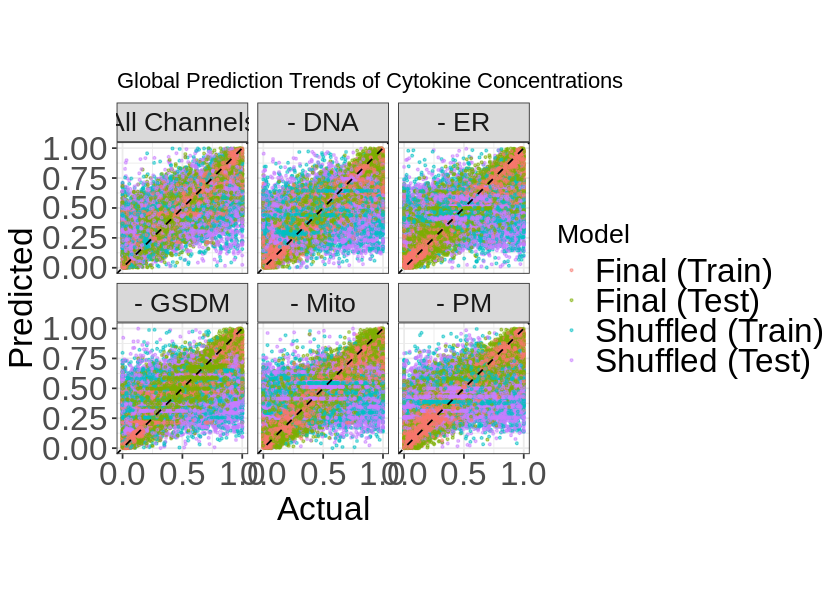

In [10]:
width=7
height=5
options(repr.plot.width=width, repr.plot.height=height)
# set output path
global_prediction_trend_path <- file.path(paste0(enet_cp_fig_path,"global_prediction_trend.png"))
# if path does not exist, create it
if (!file.exists(dirname(global_prediction_trend_path))) {
    print(dirname(global_prediction_trend_path))
    dir.create(dirname(global_prediction_trend_path), recursive = TRUE)
}
# plot the data
global_prediction_trend_scatter <- (
    ggplot(df, aes(x=actual_value, y=predicted_value, col=shuffle_plus_data_split))
    + geom_point(alpha=0.5, size=0.5) 
    # add geom smooth with each line being a different color
    + labs(x="Actual", y="Predicted") 
    + theme_bw()
    + labs(title="Global Prediction Trends of Cytokine Concentrations")
    # add y=x line
    + geom_abline(intercept = 0, slope = 1, linetype="dashed", color="black")
    + facet_wrap(~channel_feature_combinations_key, ncol=3)
    + ggplot2::coord_fixed()
    + ylim(0, 1)
    + xlim(0, 1)
    # change the x axis ticks to 0, 0,5, 1
    + scale_x_continuous(breaks = seq(0, 1, by = 0.5))
    # # make the facet labels more readable 
    # + theme(strip.text.x = element_text(size = 12, angle = 0))
    # # make the legend title bigger
    # + theme(legend.title=element_text(size=18), legend.text=element_text(size=14))
    # + theme(axis.text.x = element_text(size=14), axis.text.y = element_text(size=14))
    
    # change legend title text
    + labs(color="Model")
    + figure_theme


)

# save the plot
ggsave(global_prediction_trend_path, global_prediction_trend_scatter, width=width, height=height, dpi=600)
global_prediction_trend_scatter

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2808 rows containing non-finite outside the scale range
(`stat_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2808 rows containing non-finite outside the scale range
(`stat_smooth()`).”


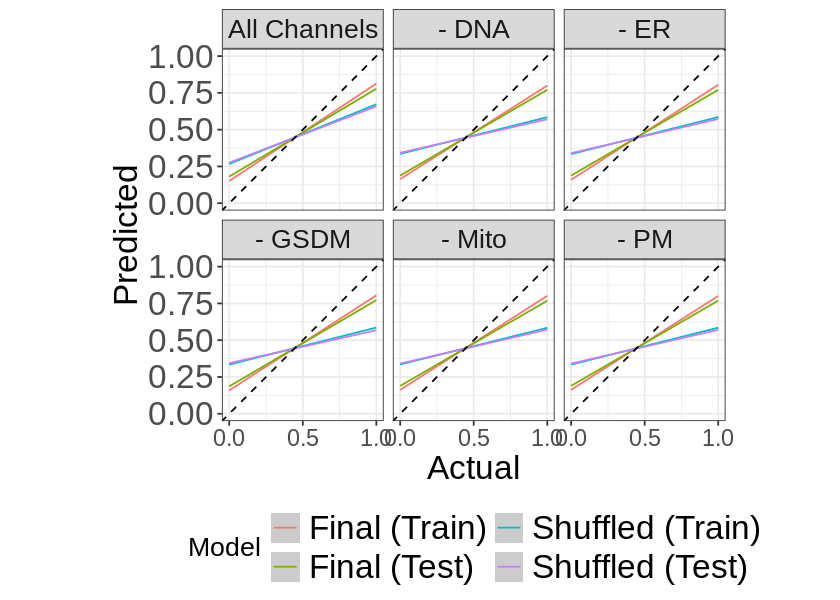

In [11]:

global_prediction_trend_line <- (
    ggplot(df, aes(x=actual_value, y=predicted_value, col=shuffle)) 
    # add geom smooth with each line being a different color
    + geom_smooth(method="lm", se=TRUE, alpha=0.5, size=0.5, aes(col=shuffle_plus_data_split))
    # make colors different for each line
    + scale_fill_gradientn(colours = viridis(10))
    + labs(x="Actual", y="Predicted", color="Model")
    + theme_bw()
    # add y=x line
    + geom_abline(intercept = 0, slope = 1, linetype="dashed", color="black")
    + facet_wrap(~channel_feature_combinations_key, ncol=3)
    + ylim(0, 1)
    + xlim(0, 1)
    # change the x axis ticks to 0, 0,5, 1
    + scale_x_continuous(breaks = seq(0, 1, by = 0.5))

    + ggplot2::coord_fixed()
    + figure_theme
    # change the x tick size
    + theme(axis.text.x = element_text(size=14))
    + theme(legend.position = "bottom")
    # make the legend have two columns of keys
    + guides(color = guide_legend(ncol=2))
)
ggsave(global_prediction_trend_path, global_prediction_trend_line, width=5, height=5, dpi=600)
global_prediction_trend_line

In [12]:
enet_cp_fig <- file.path(paste0(enet_cp_fig_path,"Predicted_vs_Actual_all_cytokines.pdf"))
pdf(file=enet_cp_fig)
# set plot size
options(repr.plot.width=6, repr.plot.height=4)
# facet by secrete 
for (i in 1:length(unique(df$cytokine))){
    sub_df <- df[df$cytokine == (unique(df$cytokine)[i]),]
# plot 
p <- (
    ggplot(sub_df, aes(x=actual_value, y=predicted_value, col=shuffle_plus_data_split))
    + geom_point() 
    + theme_bw() 
    + geom_smooth(method=lm, se=TRUE, formula = y ~ x, alpha=0.5, size=0.5)
    + labs(x="Actual", y="Predicted") 

    + ggtitle(unique(df$cytokine)[i])
    + ylim(0, 1)
    + xlim(0, 1)
    + theme(
        axis.text.x = element_text(size = 12),
        axis.text.y = element_text(size = 12),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        # center the title
        plot.title = element_text(hjust = 0.5)
    )
    + labs(color="Model", hjust=0.5)

    # change facet label size
    + theme(strip.text.x = element_text(size = 12))
    + theme(strip.text.y = element_text(size = 12))
    # change legend text size
    + theme(legend.text=element_text(size=12))
    # change legend title size
    + theme(legend.title=element_text(size=14))
    # change legend title
    # make kegend key background white
    + guides(color = guide_legend(override.aes = list(fill = NA)),
         linetype = guide_legend(override.aes = list(fill = NA)))
    + theme(legend.key = element_rect(fill = "white"))
    )
    plot(p)
}
dev.off()


Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing missing values or val

png 
  2

In [13]:
# remove '[]' from the string in the column
df_var$r2 <- gsub("\\[|\\]", "", df_var$r2)
# set the column as numeric
df_var$r2 <- as.numeric(df_var$r2)
df_var$shuffle_plus_data_split <- paste0(df_var$shuffle, "_", df_var$data_split)
df_var$shuffle_plus_data_split <- gsub("final_test", "Final (Test)", df_var$shuffle_plus_data_split)
df_var$shuffle_plus_data_split <- gsub("final_train", "Final (Train)", df_var$shuffle_plus_data_split)
df_var$shuffle_plus_data_split <- gsub("shuffled_baseline_test", "Shuffled (Test)", df_var$shuffle_plus_data_split)
df_var$shuffle_plus_data_split <- gsub("shuffled_baseline_train", "Shuffled (Train)", df_var$shuffle_plus_data_split)
df_var$shuffle_plus_data_split <- factor(df_var$shuffle_plus_data_split, levels = c(
    "Final (Train)", 
    "Final (Test)",
    "Shuffled (Train)", 
    "Shuffled (Test)" 
    ))
head(df_var)

,cytokine,data_split,shuffle,channel_feature_combinations_key,predicted_value,actual_value,r2,shuffle_plus_data_split
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
1,FGF-19,test,shuffled_baseline,CorrMito_CorrER,0.0006061006,0.03920445,-0.04121760,Shuffled (Test)
2,IFgamma,train,final,CorrDNA_CorrMito,0.0854940674,0.10081548,0.93373251,Final (Train)
3,BMP9,test,final,No_channels,0.0040120356,0.03177307,0.15761338,Final (Test)
4,TRAIL,train,shuffled_baseline,CorrDNA_CorrMito,0.0019251063,0.01956609,-0.01720808,Shuffled (Train)
5,TPO(Thrombopoietin),train,shuffled_baseline,CorrDNA_CorrPM_CorrMito_CorrER,0.0000000000,0.02462152,0.00000000,Shuffled (Train)
6,IL-2,test,shuffled_baseline,CorrPM_CorrGasdermin_CorrER,0.0016635598,0.01493719,-0.04348859,Shuffled (Test)


In [14]:
# replace keys with more readable names
# sort the unique keys by length
unique(df_var$channel_feature_combinations_key)
# get only select keys
df_var <- df_var %>% filter(
    channel_feature_combinations_key %in% c("All_channels", 
        "CorrDNA_CorrGasdermin_CorrMito_CorrER", 
        "CorrDNA_CorrPM_CorrGasdermin_CorrER", 
        "CorrDNA_CorrPM_CorrGasdermin_CorrMito", 
        "CorrDNA_CorrPM_CorrMito_CorrER",
        "CorrPM_CorrGasdermin_CorrMito_CorrER"
    )
)
unique(df_var$channel_feature_combinations_key)
    

[1] "CorrMito_CorrER"                      
 [2] "CorrDNA_CorrMito"                     
 [3] "No_channels"                          
 [4] "CorrDNA_CorrPM_CorrMito_CorrER"       
 [5] "CorrPM_CorrGasdermin_CorrER"          
 [6] "CorrDNA_CorrER"                       
 [7] "CorrDNA_CorrPM_CorrGasdermin_CorrMito"
 [8] "CorrPM_CorrGasdermin_CorrMito"        
 [9] "All_channels"                         
[10] "CorrDNA_CorrMito_CorrER"              
[11] "CorrPM_CorrGasdermin_CorrMito_CorrER" 
[12] "CorrGasdermin_CorrER"                 
[13] "CorrDNA_CorrGasdermin"                
[14] "CorrDNA_CorrGasdermin_CorrMito"       
[15] "CorrPM_CorrER"                        
[16] "CorrPM_CorrMito"                      
[17] "CorrGasdermin_CorrMito_CorrER"        
[18] "CorrPM_CorrMito_CorrER"               
[19] "CorrDNA"                              
[20] "CorrDNA_CorrGasdermin_CorrER"         
[21] "CorrDNA_CorrPM_CorrGasdermin"         
[22] "CorrDNA_CorrPM_CorrMito"              
[23] "CorrGasdermin"                        
[24] "CorrDNA_CorrPM_CorrER"                
[25] "CorrER"                               
[26] "CorrDNA_CorrGasdermin_CorrMito_CorrER"
[27] "CorrDNA_CorrPM"                       
[28] "CorrPM_CorrGasdermin"                 
[29] "CorrDNA_CorrPM_CorrGasdermin_CorrER"  
[30] "CorrMito"                             
[31] "CorrGasdermin_CorrMito"               
[32] "CorrPM"

[1] "CorrDNA_CorrPM_CorrMito_CorrER"       
[2] "CorrDNA_CorrPM_CorrGasdermin_CorrMito"
[3] "All_channels"                         
[4] "CorrPM_CorrGasdermin_CorrMito_CorrER" 
[5] "CorrDNA_CorrGasdermin_CorrMito_CorrER"
[6] "CorrDNA_CorrPM_CorrGasdermin_CorrER"

In [15]:

df_var$channel_feature_combinations_key <- gsub('All_channels', "All Channels", df_var$channel_feature_combinations_key)
df_var$channel_feature_combinations_key <- gsub('CorrDNA_CorrGasdermin_CorrMito_CorrER', "- PM", df_var$channel_feature_combinations_key)
df_var$channel_feature_combinations_key <- gsub('CorrDNA_CorrPM_CorrGasdermin_CorrER' , "- Mito", df_var$channel_feature_combinations_key)
df_var$channel_feature_combinations_key <- gsub('CorrDNA_CorrPM_CorrGasdermin_CorrMito' , "- ER", df_var$channel_feature_combinations_key)
df_var$channel_feature_combinations_key <- gsub('CorrDNA_CorrPM_CorrMito_CorrER' , "- GSDM", df_var$channel_feature_combinations_key)
df_var$channel_feature_combinations_key <- gsub('CorrPM_CorrGasdermin_CorrMito_CorrER' , "- DNA", df_var$channel_feature_combinations_key)
# make the channel_feature_combinations_key a factor
df_var$channel_feature_combinations_key <- factor(df_var$channel_feature_combinations_key, levels = c(
    "All Channels", "- DNA","- ER", "- GSDM", "- Mito",  "- PM"
)
)



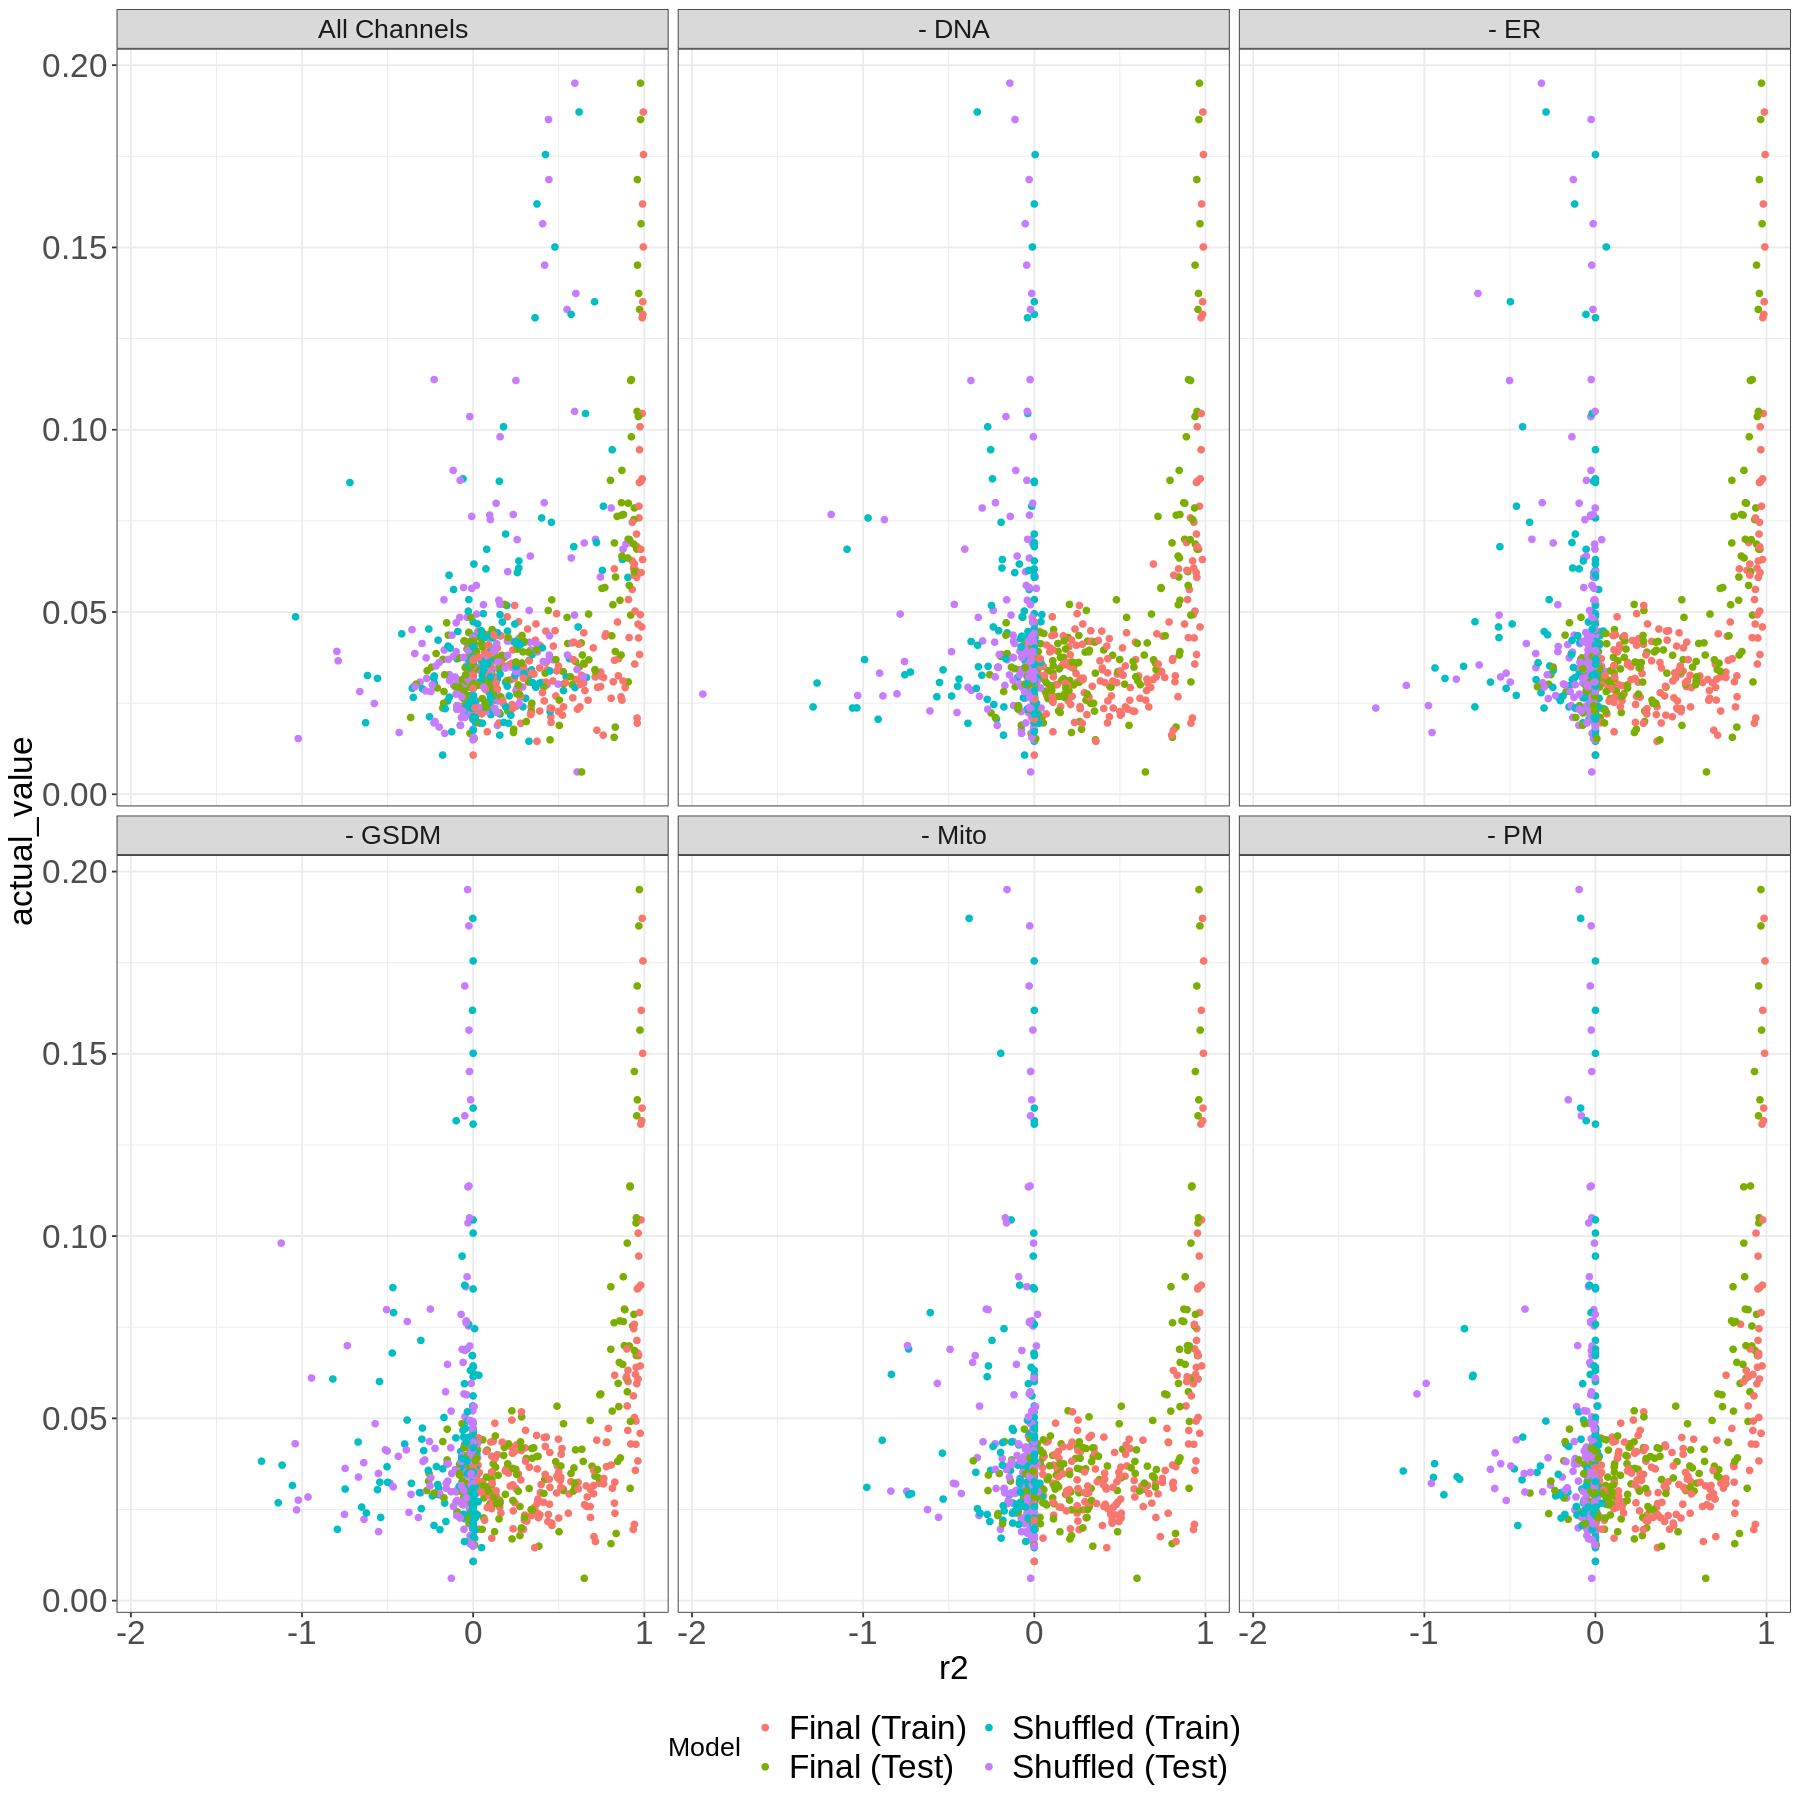

In [16]:
# set plot size 
width <- 15
height <- 15
options(repr.plot.width=width, repr.plot.height=height)
# set output path
global_variance_r2_path <- file.path(paste0(enet_cp_fig_path,"global_variance_r2.png"))
# if path does not exist, create it
if (!file.exists(dirname(global_prediction_trend_path))) {
    print(dirname(global_prediction_trend_path))
    dir.create(dirname(global_prediction_trend_path), recursive = TRUE)
}
# plot df_var df
variance_r2_plot <- (
    ggplot(df_var, aes(x=r2, y=actual_value,col=shuffle_plus_data_split)) 
    + geom_point() 
    # + geom_smooth(method=lm, se=TRUE) 
    + theme_bw()

    # change the x and y axis text size
    + theme(
        axis.text.x = element_text(size=13), 
        axis.text.y = element_text(size=13), 
        legend.text=element_text(size=16), 
        axis.title=element_text(size=16),
        legend.title=element_text(size=16)
    )
    # make legend points bigger
    + guides(
        colour = guide_legend(override.aes = list(size=3)),
        shape = guide_legend(override.aes = list(size=3))
    )
    + figure_theme
    + facet_wrap(~channel_feature_combinations_key, ncol=3)
    + labs(color="Model")
    + theme(legend.position = "bottom")
    + guides(color = guide_legend(ncol=2))
    + scale_x_continuous(breaks = seq(-2, 1, by = 1))

)
ggsave(global_variance_r2_path, variance_r2_plot, width=width, height=height, dpi=600)
variance_r2_plot


Warning message:
“Removed 1736 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1736 rows containing missing values or values outside the scale range
(`geom_point()`).”


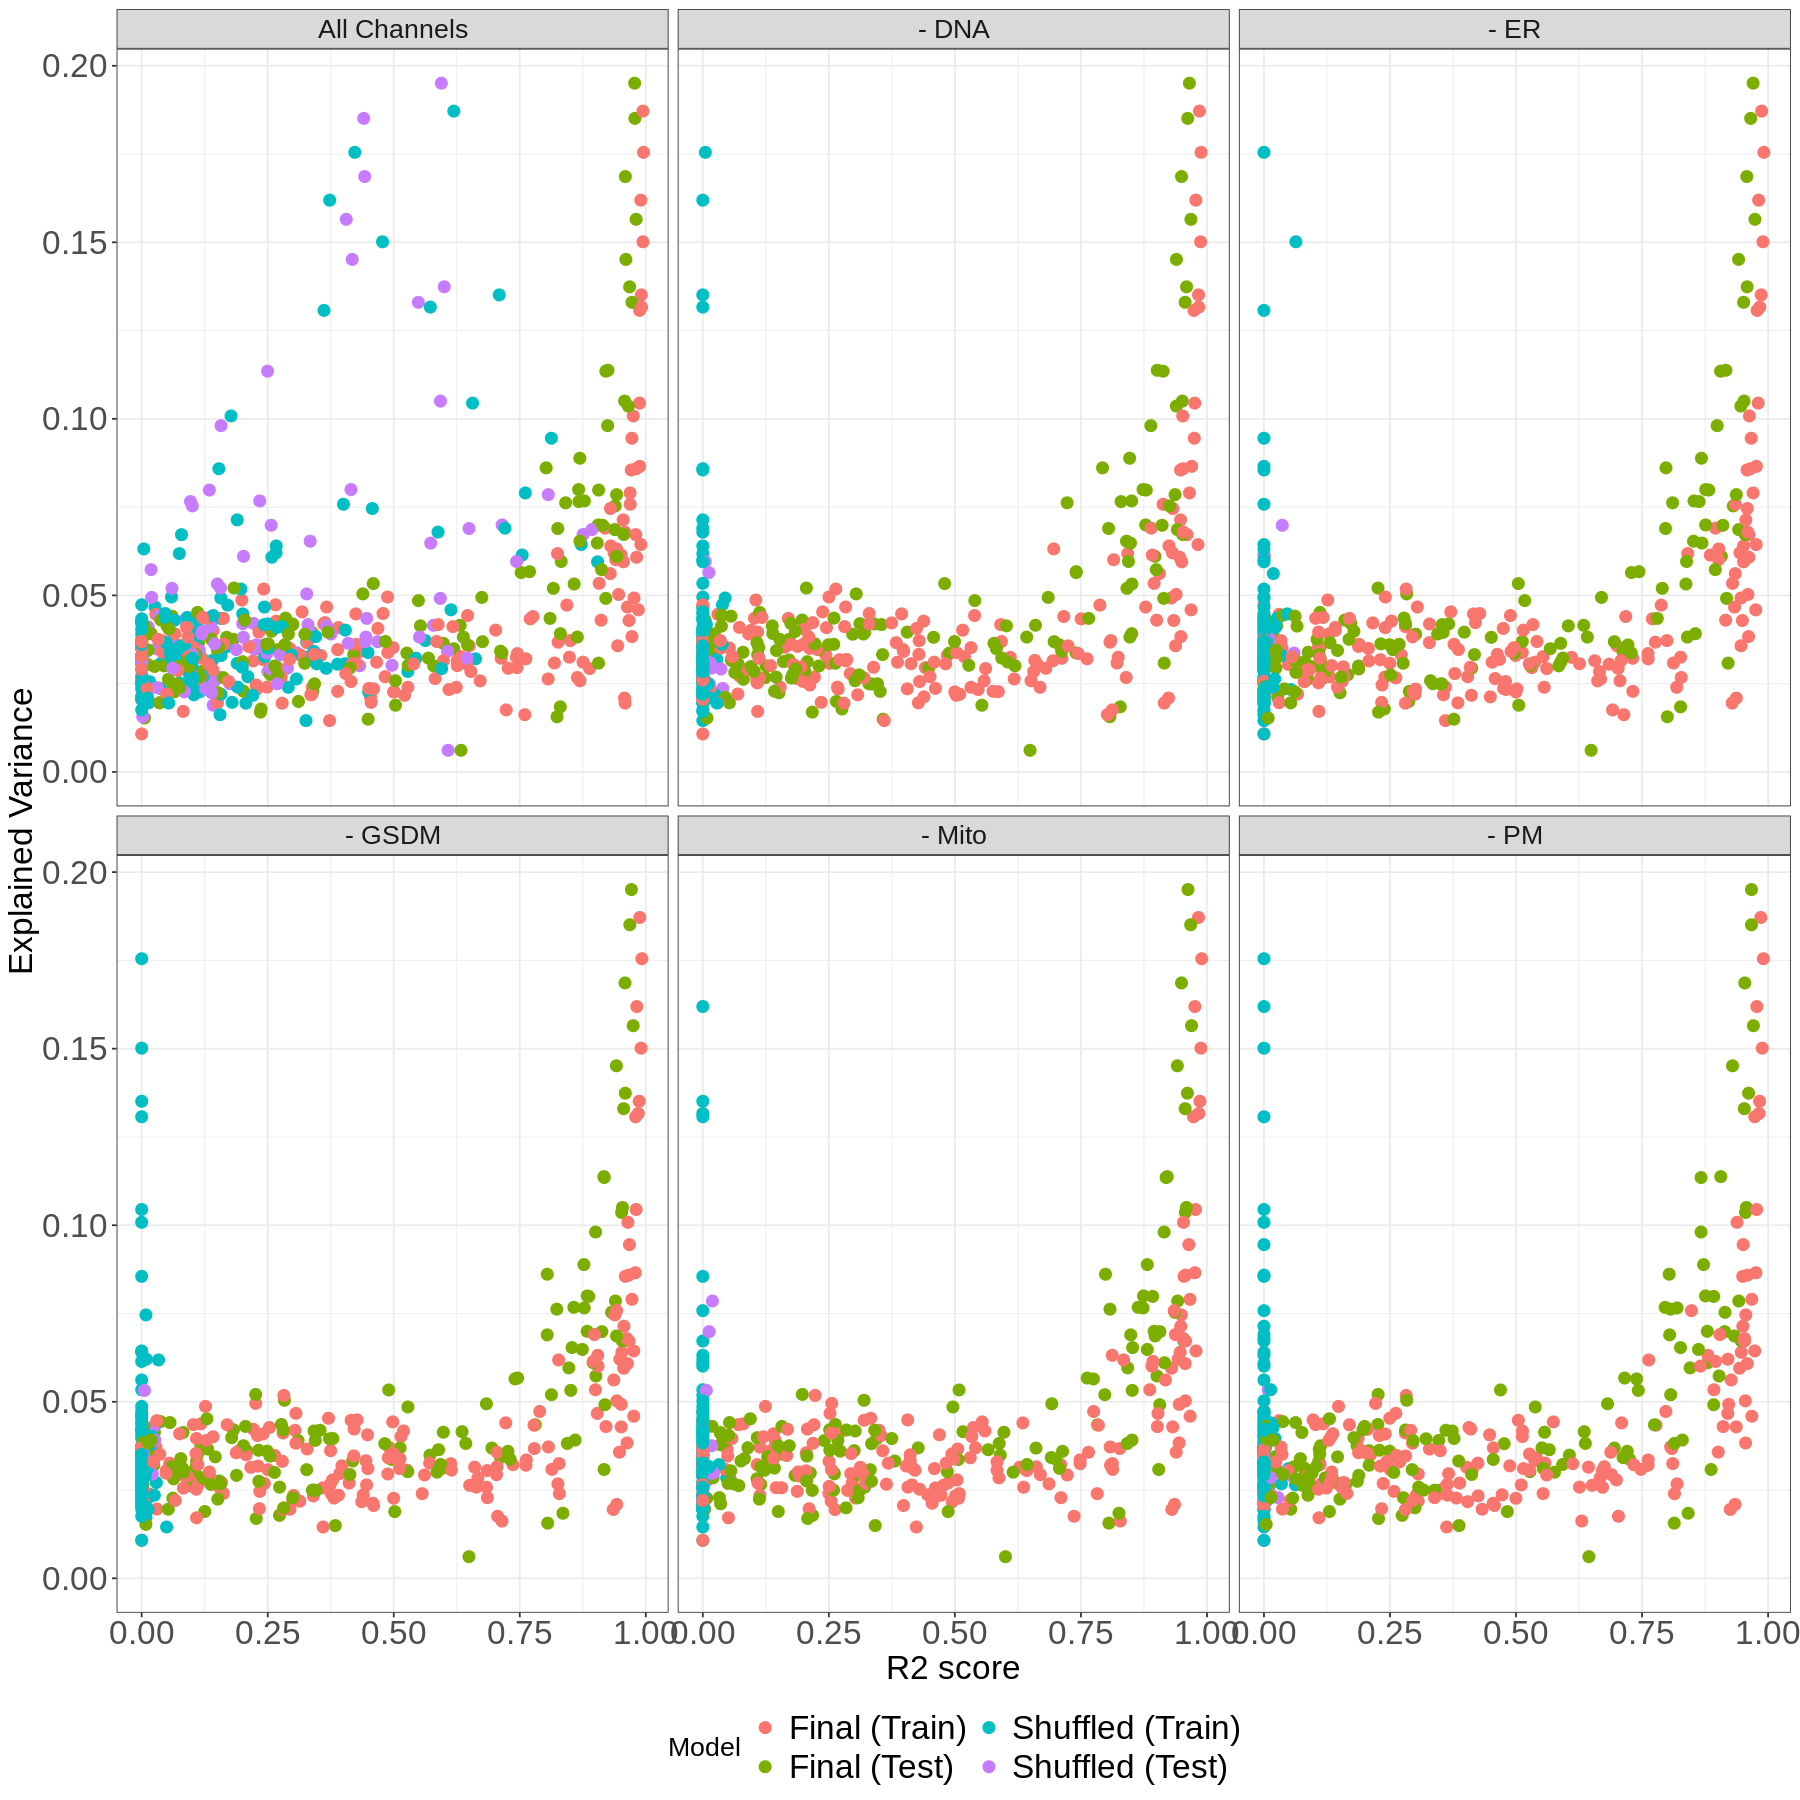

In [17]:

local_variance_r2_path <- file.path(paste0(enet_cp_fig_path,"local_variance_r2.png"))
local_variance_r2_legend_path <- file.path(paste0(enet_cp_fig_path,"local_variance_r2_legend.png"))
# if path does not exist, create it
if (!file.exists(dirname(global_prediction_trend_path))) {
    print(dirname(global_prediction_trend_path))
    dir.create(dirname(global_prediction_trend_path), recursive = TRUE)
}
# same plot but only in the positive quadrant
variance_r2_plot <- (
    ggplot(df_var, aes(x=r2, y=actual_value, col=shuffle_plus_data_split)) 
    + geom_point(size=3)
    + labs(x="R2 score", y="Explained Variance") 
    + theme_bw()
    + xlim(0, max(df_var$r2))
    + ylim(0, max(df_var$actual_value))
    # change the x and y axis text size
    + theme(
        axis.text.x = element_text(size=13), 
        axis.text.y = element_text(size=13), 
        legend.text=element_text(size=16), 
        axis.title=element_text(size=16),
        legend.title=element_text(size=16)
    )
    
    # make legend points bigger
    + guides(
        colour = guide_legend(override.aes = list(size=3)),
        shape = guide_legend(override.aes = list(size=3))
    )
    + figure_theme
    + facet_wrap(~channel_feature_combinations_key, ncol=3)
    + labs(color="Model")
    + theme(legend.position = "bottom")     
    + guides(color = guide_legend(ncol=2))
)
ggsave(local_variance_r2_path, variance_r2_plot, width=width, height=height, dpi=600)
variance_r2_plot

### Model performance

In [18]:
df_stats_path <- file.path(
    paste0("../../../11.bulk_Morphology_Elastic_Network_LOCO/2.test_models/results/regression/",cell_type,"_aggregated_with_nomic/model_stats.csv"
    )
)
# import csv file
df_stats <- read.csv(df_stats_path)
df_stats$shuffle_plus_data_split <- paste0(df_stats$shuffle, "_", df_stats$data_split)
df_stats$shuffle_plus_data_split <- gsub("shuffled_baseline_test", "Shuffled (Test)", df_stats$shuffle_plus_data_split)
df_stats$shuffle_plus_data_split <- gsub("shuffled_baseline_train", "Shuffled (Train)", df_stats$shuffle_plus_data_split)
df_stats$shuffle_plus_data_split <- gsub("final_test", "Final (Test)", df_stats$shuffle_plus_data_split)
df_stats$shuffle_plus_data_split <- gsub("final_train", "Final (Train)", df_stats$shuffle_plus_data_split)
head(df_stats)

,explained_variance,neg_mean_absolute_error,neg_mean_squared_error,well,treatment,r2,cytokine,data_split,shuffle,predicted_value,actual_value,log10_neg_mean_absolute_error,log10_neg_mean_squared_error,log10_explained_variance,channel_feature_combinations_key,shuffle_plus_data_split
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,-0.2440144,-0.04321352,-0.04321352,B02,LPS_0.010_ug_per_ml_DMSO_0.025_%,-0.2698533,HVEM,test,final,0.4491996,0.4839627,1.36438,1.36438,NA,CorrDNA_CorrPM_CorrER,Final (Test)
2,-0.2440144,-0.04321352,-0.04321352,B03,LPS_0.010_ug_per_ml_DMSO_0.025_%,-0.2698533,HVEM,test,final,0.4209803,0.7366997,1.36438,1.36438,NA,CorrDNA_CorrPM_CorrER,Final (Test)
3,-0.2440144,-0.04321352,-0.04321352,B04,LPS_Nigericin_100.000_ug_per_ml_1.000_uM_DMSO_0.025_%,-0.2698533,HVEM,test,final,0.4630545,0.6846210,1.36438,1.36438,NA,CorrDNA_CorrPM_CorrER,Final (Test)
4,-0.2440144,-0.04321352,-0.04321352,B05,LPS_Nigericin_100.000_ug_per_ml_1.000_uM_DMSO_0.025_%,-0.2698533,HVEM,test,final,0.4523376,0.1594672,1.36438,1.36438,NA,CorrDNA_CorrPM_CorrER,Final (Test)
5,-0.2440144,-0.04321352,-0.04321352,B06,DMSO_0.100_%_DMSO_0.025_%,-0.2698533,HVEM,test,final,0.3599260,0.4707154,1.36438,1.36438,NA,CorrDNA_CorrPM_CorrER,Final (Test)
6,-0.2440144,-0.04321352,-0.04321352,B09,LPS_0.010_ug_per_ml_DMSO_0.025_%,-0.2698533,HVEM,test,final,0.4602019,0.4924419,1.36438,1.36438,NA,CorrDNA_CorrPM_CorrER,Final (Test)


In [19]:
# replace keys with more readable names
# sort the unique keys by length
# get only select keys
df_stats <- df_stats %>% filter(
    channel_feature_combinations_key %in% c("All_channels", 
        "CorrDNA_CorrGasdermin_CorrMito_CorrER", 
        "CorrDNA_CorrPM_CorrGasdermin_CorrER", 
        "CorrDNA_CorrPM_CorrGasdermin_CorrMito", 
        "CorrDNA_CorrPM_CorrMito_CorrER",
        "CorrPM_CorrGasdermin_CorrMito_CorrER"
    )
)

df_stats$channel_feature_combinations_key <- gsub('All_channels', "All Channels", df_stats$channel_feature_combinations_key)
df_stats$channel_feature_combinations_key <- gsub('CorrDNA_CorrGasdermin_CorrMito_CorrER', "- PM", df_stats$channel_feature_combinations_key)
df_stats$channel_feature_combinations_key <- gsub('CorrDNA_CorrPM_CorrGasdermin_CorrER' , "- Mito", df_stats$channel_feature_combinations_key)
df_stats$channel_feature_combinations_key <- gsub('CorrDNA_CorrPM_CorrGasdermin_CorrMito' , "- ER", df_stats$channel_feature_combinations_key)
df_stats$channel_feature_combinations_key <- gsub('CorrDNA_CorrPM_CorrMito_CorrER' , "- GSDM", df_stats$channel_feature_combinations_key)
df_stats$channel_feature_combinations_key <- gsub('CorrPM_CorrGasdermin_CorrMito_CorrER' , "- DNA", df_stats$channel_feature_combinations_key)
# make the channel_feature_combinations_key a factor
df_stats$channel_feature_combinations_key <- factor(df_stats$channel_feature_combinations_key, levels = c(
    "All Channels", "- DNA","- ER", "- GSDM", "- Mito",  "- PM"
)
)
    

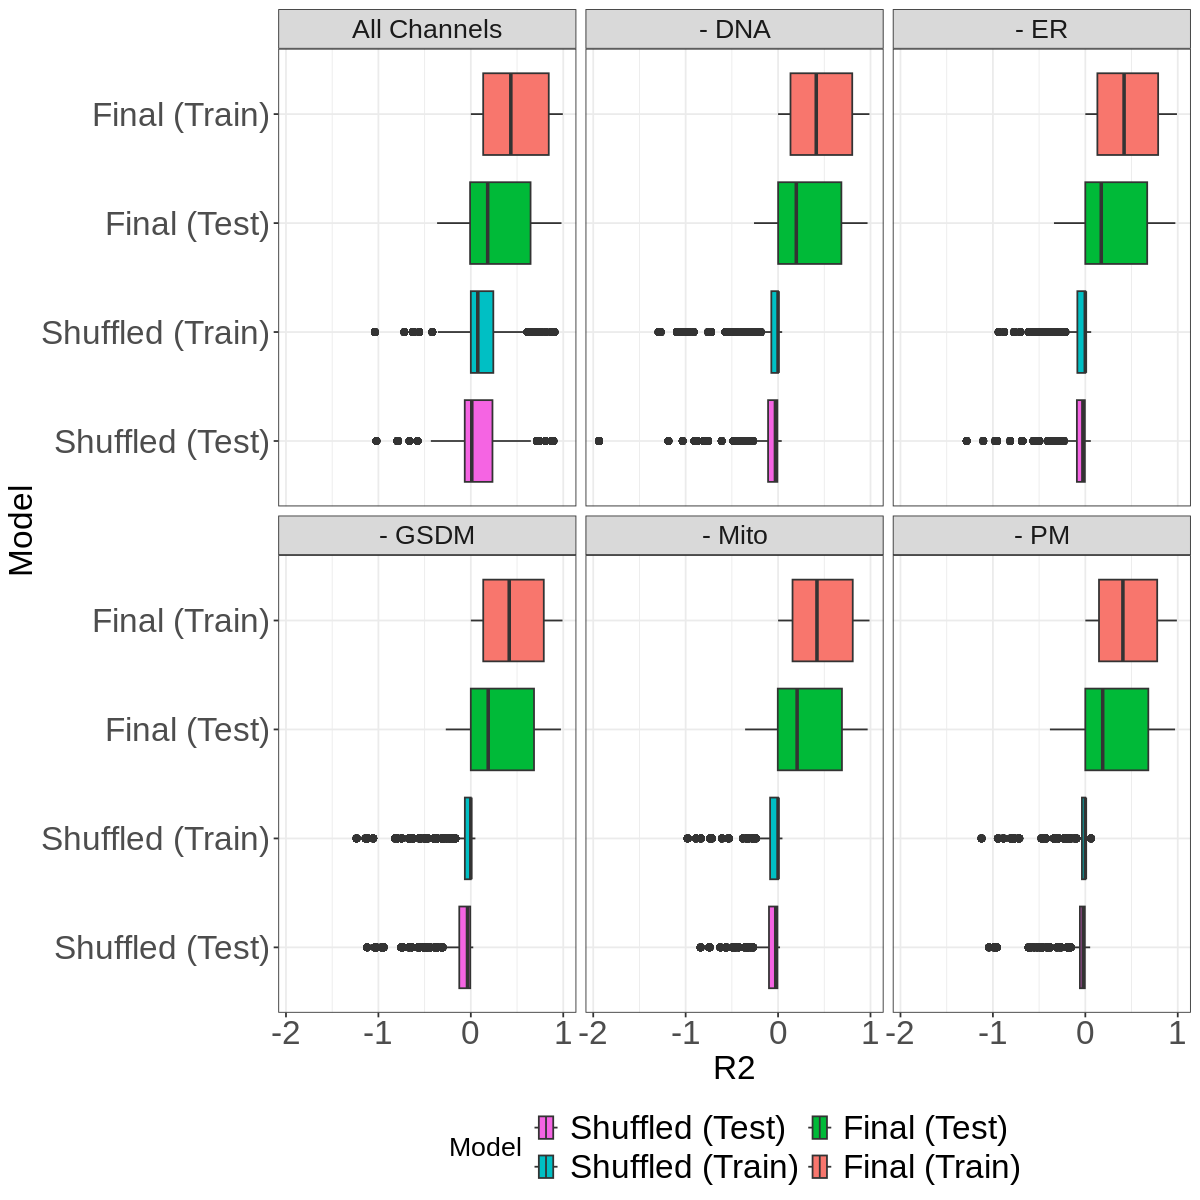

In [20]:
# df_stats factor levels
df_stats$shuffle_plus_data_split <- factor(
    df_stats$shuffle_plus_data_split,
    levels = c(
        "Shuffled (Test)",
        "Shuffled (Train)",
        "Final (Test)",
        "Final (Train)"
    )
)
# get the default R color palette
default_colors <- c("#F8766D", "#00BA38", "#00BFC4", "#F564E3")

width = 10
height = 10
options(repr.plot.width=width, repr.plot.height=height)
r2_boxplot <- (
    ggplot(df_stats, aes(x=r2, y=shuffle_plus_data_split, fill=shuffle_plus_data_split)) 
        + geom_boxplot()
        + figure_theme
        + ylab("Model")
        + xlab("R2")
        # change legend labels
        + labs(fill = "Model", hjust=0.5)
        # change legend title size
        + figure_theme
        # remove legend 
        + theme(legend.position="none")
        # change color of the boxplot
        + scale_fill_manual(values=c(
            default_colors[4],
            default_colors[3],
            default_colors[2],
            default_colors[1]
        ))
        + facet_wrap(~channel_feature_combinations_key, ncol=3)
        + theme(legend.position = "bottom")     
        + guides(fill = guide_legend(ncol=2))
        

)
r2_boxplot

### Cytokine prediction:


In [21]:
pred_v_actual_plot <- function(df, cytokine){
    tmp_df <- df[df$cytokine == cytokine,]
    p <- (
        ggplot(tmp_df, aes(x=actual_value, y=predicted_value, col=shuffle_plus_data_split))
        + geom_point() 
        + theme_bw() 
        + geom_smooth(method=lm, se=TRUE, formula = y ~ x, alpha=0.5, size=0.5)
        + labs(x=paste0("Actual ",cytokine), y=paste0("Predicted ", cytokine)) 

        + ggtitle(cytokine)
        + ylim(0, 1)
        + xlim(0, 1)
        + figure_theme
        + labs(color="Model", hjust=0.5)
        # change legend title
        # make kegend key background white
        + guides(color = guide_legend(override.aes = list(fill = NA)),
            linetype = guide_legend(override.aes = list(fill = NA)))
        + theme(legend.key = element_rect(fill = "white"))
        + ggplot2::coord_fixed()
        + facet_wrap(~channel_feature_combinations_key, ncol=3)
        + theme(legend.position = "bottom")     
        + guides(color = guide_legend(ncol=2))
            # change the x axis ticks to 0, 0,5, 1
    + scale_x_continuous(breaks = seq(0, 1, by = 0.5))
        )
    return(p)
}


Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 203 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 203 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 204 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 204 rows containing missing values or values outside the scale range
(`geom_point()`).”


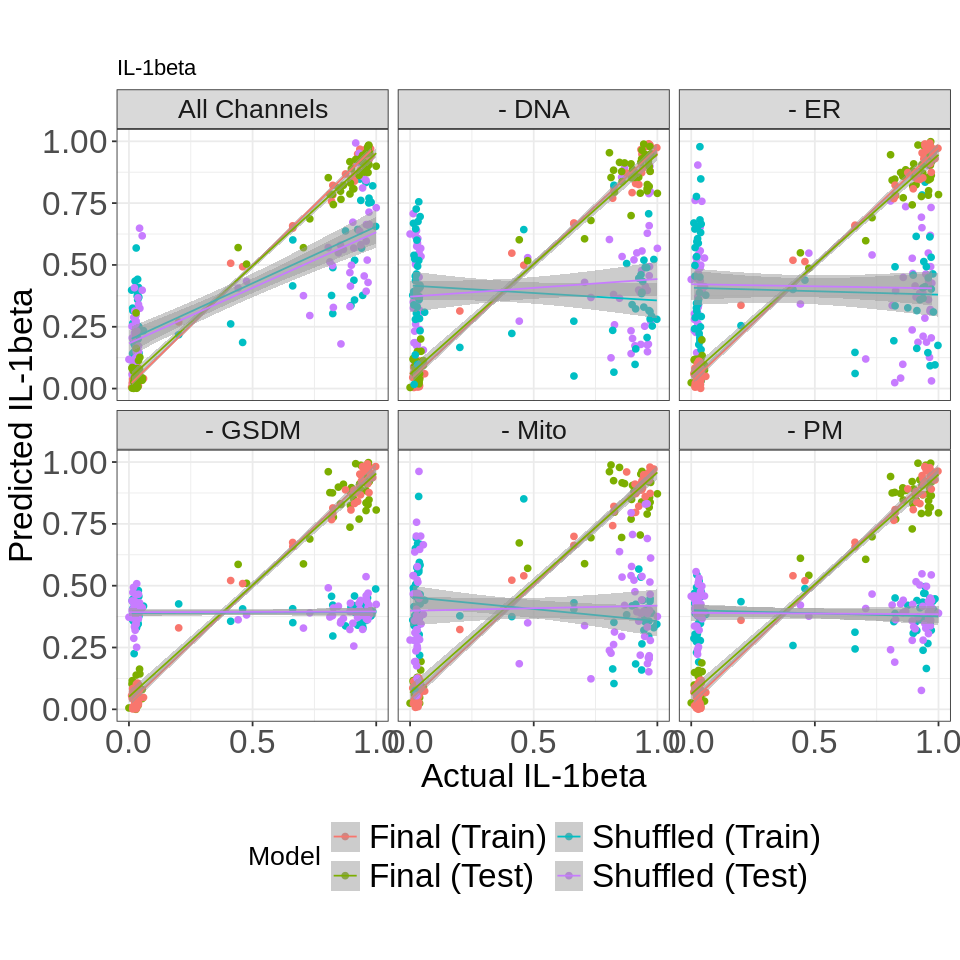

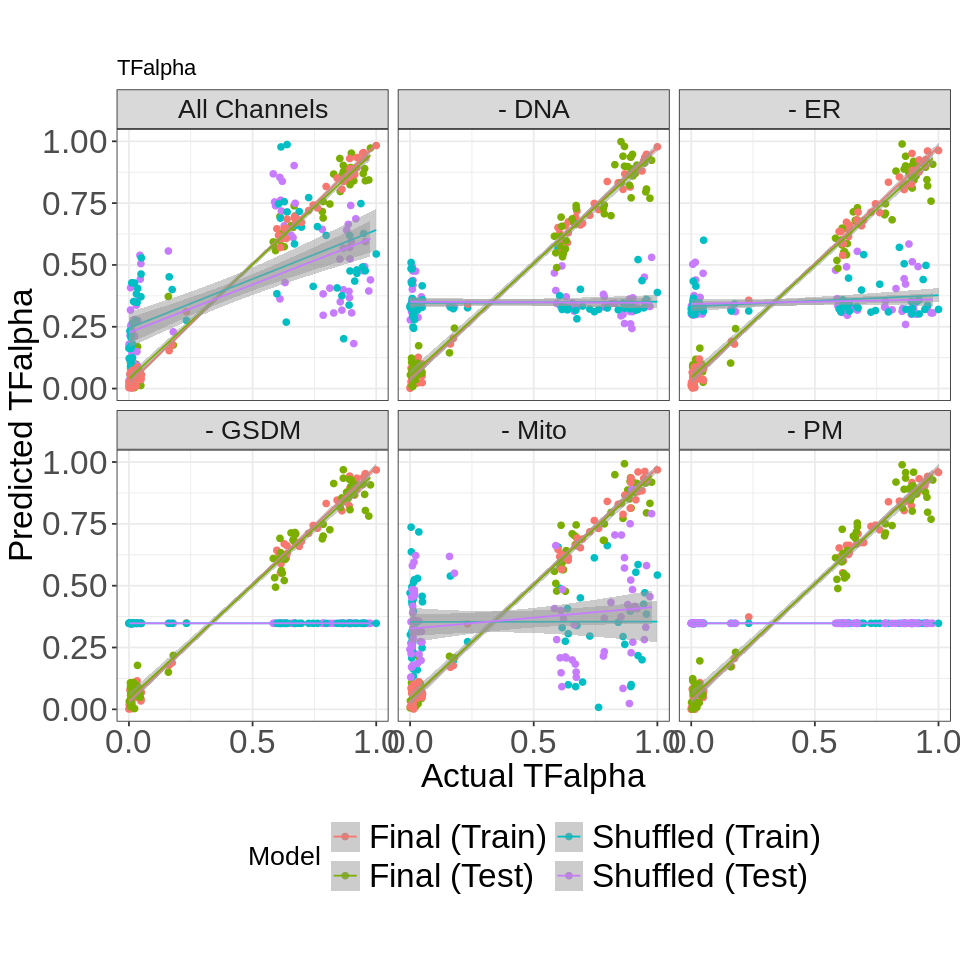

In [22]:
# df_stats factor levels
df_stats$shuffle_plus_data_split <- factor(
    df_stats$shuffle_plus_data_split,
    levels = c(
        "Final (Train)",
        "Final (Test)",
        "Shuffled (Train)",
        "Shuffled (Test)"
    )
)

enet_cp_fig <- file.path(paste0(enet_cp_fig_path,"Predicted_vs_Actual_all_cytokines.png"))
# set plot size
width <- 8
height <- 8
options(repr.plot.width=width, repr.plot.height=height)
# subset the data to only include the cytokine of interest

IL1beta_a_v_p <- pred_v_actual_plot(df_stats, "IL-1beta") 
TNFalpha_a_v_p <- pred_v_actual_plot(df_stats, "TFalpha") 

IL1beta_a_v_p
TNFalpha_a_v_p


### Final Figure

In [23]:
global_prediction_trend_line <- (
    global_prediction_trend_line
    # remove the title
    + theme(plot.title = element_blank())
)
# r2_boxplot
# variance_r2_plot
IL1beta_a_v_p <- (
    IL1beta_a_v_p
    # remove the title
    + theme(plot.title = element_blank())
)

In [24]:
# resize all plots 
width <- 8
height <- 8
options(repr.plot.width=width, repr.plot.height=height)
global_prediction_trend_line <- (global_prediction_trend_line)
r2_boxplot <- (r2_boxplot)
variance_r2_plot <- (variance_r2_plot)
IL1beta_a_v_p <- (IL1beta_a_v_p)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2808 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 1736 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 203 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 203 rows containing missing values or values outside the scale range
(`geom_point()`).”


png 
  2

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2808 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 1736 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 203 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 203 rows containing missing values or values outside the scale range
(`geom_point()`).”


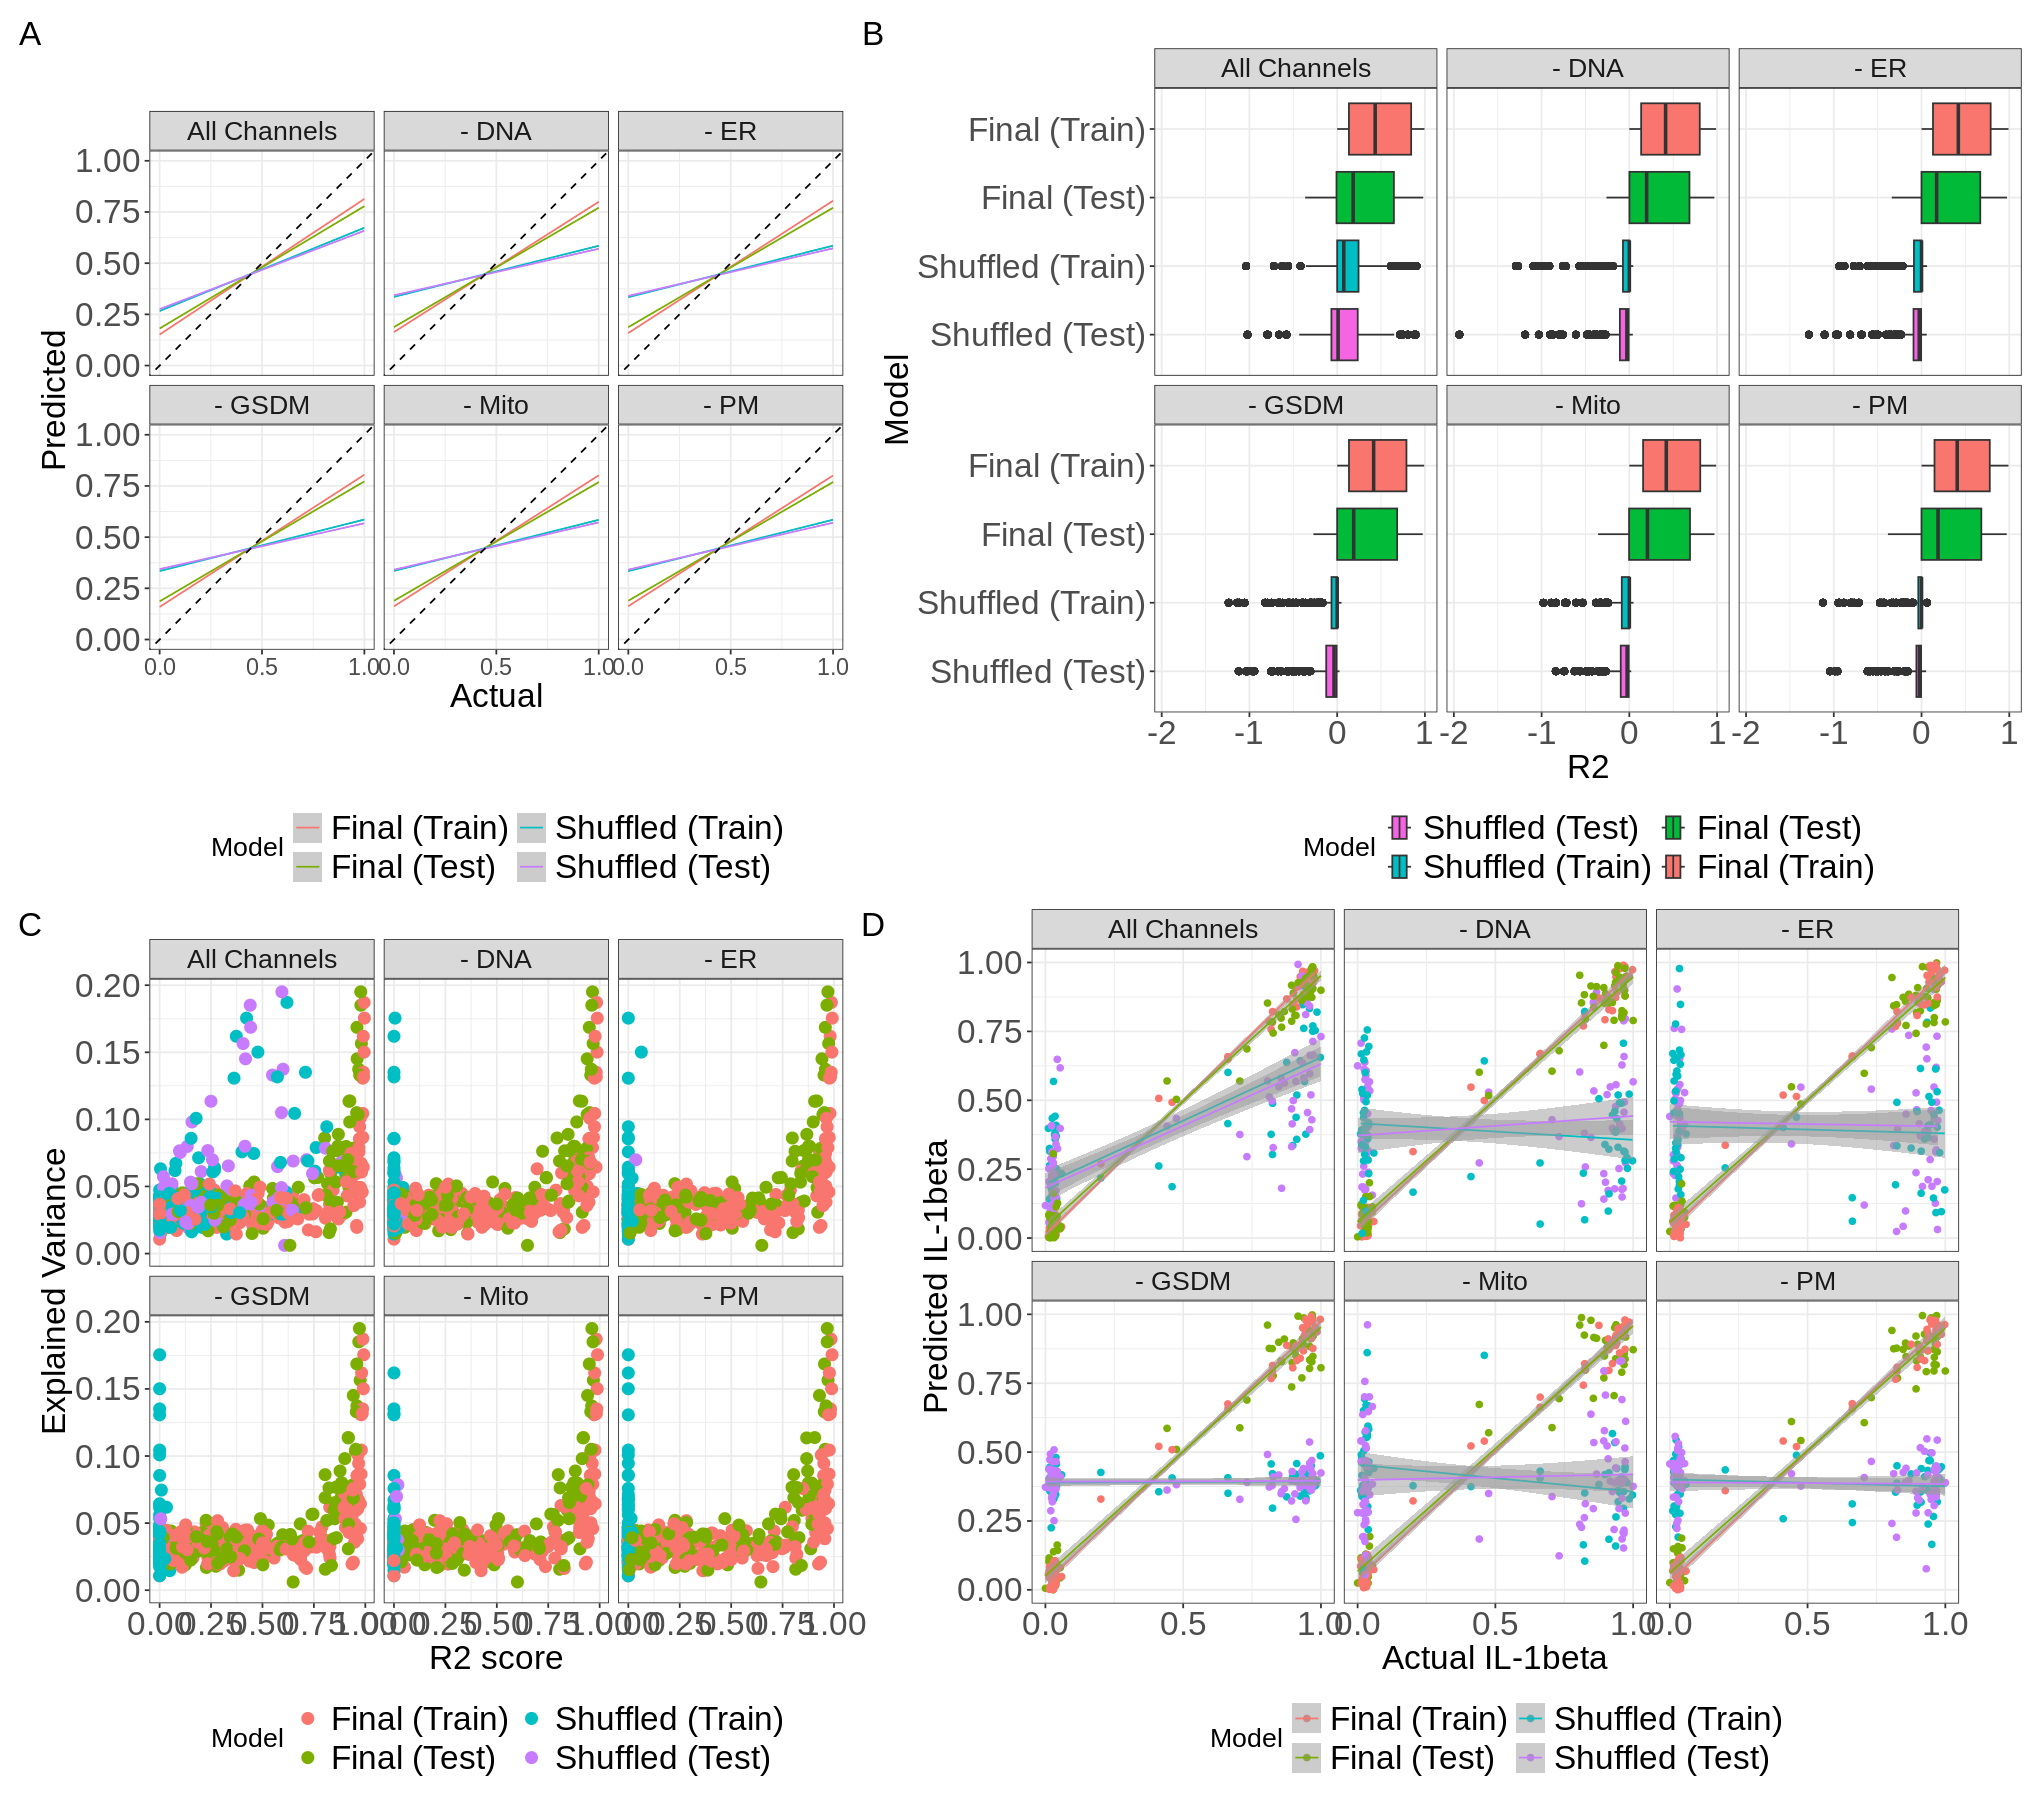

In [25]:

# pathwork layout of each plot ( letters correspond to the order in which the plots are defined below in the pathwork figure)
# where A is the first plot defined and B is the second plot defined, etc.
design <-   "AB
             CD
             EE
             EE

             "

layout <- c(
    area(t=1, b=1, l=1, r=1), # A
    area(t=1, b=1, l=2, r=2), # B
    # area(t=1, b=1, l=3, r=3), # B
    area(t=2, b=2, l=1, r=1), # C
    area(t=2, b=2, l=2, r=2) # D
)
# set plot size
width <- 17
height <- 15
options(repr.plot.width=width, repr.plot.height=height)
ENET_LOCO <- (
    global_prediction_trend_line
    + r2_boxplot
    + variance_r2_plot
    + wrap_elements(full = IL1beta_a_v_p)
    + plot_layout(design = layout, widths = c(0.8, 1))
    # make bottom plot not align
    + plot_annotation(tag_levels = 'A') & theme(plot.tag = element_text(size = 20))
)

png(file = paste0(final_fig_path, "ENET_LOCO.png"), width = width, height = height, units = "in", res = 600)
ENET_LOCO
dev.off()

ENET_LOCO